# Pré-Processamento da Base de Dados - Instituições de Ensino Superior (IES):

## Importação das Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import factorize
import re

--------------------------------------------

## Obtenção dos Datasets:

In [2]:
df = pd.DataFrame()
df = pd.read_csv('../../data/trabalho2_dados10.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,Ativa,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,Ativa,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,Ativa,2772,0.705882,3,3,2.102,2.102,2.102,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,Ativa,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
4,21685,1,Ativa,161,0.400000,S/C,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,-3,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,21215,0,Ativa,516,1.000000,4,S/C,S/D,S/D,S/D,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
2173,1465,1,Ativa,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505
2174,638,0,Ativa,885,0.600000,4,S/C,2.5174,2.6176,2.5861,1,-0.038257,1882,0.111052,1,9.297316e+06,0.662687
2175,13897,1,Ativa,2506,0.400000,3,3,2.3561,2.2901,0,1,-0.047619,357,0.000000,2,1.210978e+06,-0.000753


----------------------------------------

## Análises Pré-processamento:

### Descrição dos Dados:

    - COLUNA             DESCRIÇÃO                                    TYPE
    - ----------------------------------------------------------------------------------
    - Codigo da IES:   |  Id da instituição                          | Inteiro
    - Natureza:        |  Com ou sem fins lucrativos                 | Binário
    - Situação:        |  Ativa ou Extinta                           | Binário
    - DIAS:            |  Dias após o último ato institucional       | Inteiro
    - %:               |  % Cursos com mais de 5 anos sem AR         | Contínuo
    - CI N:            |  Conceito Institucional mais recente        | 1 a 5
    - CI V:            |  Penúltimo Conceito Institucional           | 1 a 5
    - IGC_N:           |  IGC mais recente                           | Inteiro
    - IGC_M:           |  Penúltimo IGC                              | Inteiro
    - IGC_V:           |  Antepenúltimo IGC                          | Inteiro
    - EAD_17:          |  Ofertou EAD em 2017                        | Binário
    - variacao_mat:    |  Variação de matrículas entre 2016 e 2017   | Contínuo
    - mat_T 2017:      |  Total de matrículas em 2017                | Inteiro
    - % FIES:          |  % de matrículas com FIES em 2017           | Contínuo
    - CURSOS:          |  Quantidade de cursos informados no censo   | Inteiro
    - saldo 2017:      |  Diferença entre receita e dispensa em 2017 | Contínuo
    - Variacao 17-16:  |  Variação do saldo entr 2016 e 2017         | Contínuo

---------------------------------------------

In [ ]:
### Quantidade de registros com valor ausente

In [3]:
# Verifique se qualquer coluna contém "S/D" em cada linha
contains_sd = df.apply(lambda row: row.str.contains('S/D').any(), axis=1)

# Calcule a porcentagem de linhas com pelo menos uma coluna contendo "S/D"
percentage_with_sd = (contains_sd.sum() / len(df)) * 100

print(f"A porcentagem de linhas com pelo menos uma coluna contendo 'S/D' é: {percentage_with_sd:.2f}%")

A porcentagem de linhas com pelo menos uma coluna contendo 'S/D' é: 31.24%


In [4]:
# Conte o número de ocorrências de 'S/D' em cada linha
count_sd = df.apply(lambda row: row.str.count('S/D').sum(), axis=1)

# Calcule a porcentagem de linhas com mais de uma ocorrência de 'S/D'
percentage_with_multiple_sd = (len(count_sd[count_sd > 1]) / len(df)) * 100

print(f"A porcentagem de linhas com mais de uma ocorrência de 'S/D' é: {percentage_with_multiple_sd:.2f}%")

A porcentagem de linhas com mais de uma ocorrência de 'S/D' é: 31.24%


In [ ]:
# Remova as colunas "Codigo da IES" e "DIAS"
df = df.drop(columns=["Codigo da IES", "DIAS"])

# Selecione todas as colunas numéricas restantes
numeric_columns = df.select_dtypes(include=['number'])

# Verifique se todos os valores nas colunas numéricas são iguais a zero
all_zeros = (numeric_columns == 0).all(axis=1)

# Calcule a porcentagem de linhas onde todas as colunas numéricas (exceto "Codigo da IES" e "DIAS") são iguais a zero
percentage_all_zeros = (all_zeros.sum() / len(df)) * 100

print(f"A porcentagem de linhas onde todas as colunas numéricas (exceto 'Codigo da IES' e 'DIAS') são iguais a zero é: {percentage_all_zeros:.2f}%")

In [ ]:
# Crie um DataFrame temporário excluindo as colunas "Codigo da IES", "DIAS", "Natureza" e "Situacao"
df_temp = df.drop(columns=["Codigo da IES", "DIAS", "Natureza", "Situacao"])

# Verifique se "S/D" ocorre em cada linha (retorna True/False)
contains_sd = df_temp.apply(lambda row: row.str.contains('S/D').any(), axis=1)

# Calcule a porcentagem de colunas em que "S/D" ocorre para cada linha
percentage_sd_per_row = (df_temp[contains_sd].apply(lambda row: (row == 'S/D').sum(), axis=1) / df_temp[contains_sd].shape[1]) * 100

# Calcule a média das porcentagens
average_percentage_sd = percentage_sd_per_row.mean()

print(f"A média da porcentagem de colunas em que 'S/D' ocorre nas linhas (ignorando 'Codigo da IES', 'DIAS', 'Natureza' e 'Situacao') é: {average_percentage_sd:.2f}%")

------------------------------------------

### Verificando Inconsistências:

In [9]:
df.dtypes

Codigo da IES       int64
Natureza            int64
Situacao           object
DIAS                int64
%                 float64
CI N               object
CI V               object
IGC_N              object
IGC_M              object
IGC_V              object
EAD_17              int64
variacao mat      float64
mat_T 2017          int64
% FIES            float64
CURSOS              int64
saldo 2017        float64
Variacao 17-16    float64
dtype: object

In [3]:
df_1 = df[['Codigo da IES', 'Natureza', 'DIAS', '%', 'EAD_17', 'variacao mat', 'mat_T 2017', '% FIES', 
           'CURSOS', 'saldo 2017', 'Variacao 17-16']]

df_2 = df[['Situacao', 'CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']]

In [13]:
df_1.isna().sum()

Codigo da IES     0
Natureza          0
DIAS              0
%                 0
EAD_17            0
variacao mat      0
mat_T 2017        0
% FIES            0
CURSOS            0
saldo 2017        0
Variacao 17-16    0
dtype: int64

In [23]:
df_1.isin(['S/C']).sum(axis=0)

Codigo da IES     0
Natureza          0
DIAS              0
%                 0
EAD_17            0
variacao mat      0
mat_T 2017        0
% FIES            0
CURSOS            0
saldo 2017        0
Variacao 17-16    0
dtype: int64

In [24]:
df_1.isin(['S/D']).sum(axis=0)

Codigo da IES     0
Natureza          0
DIAS              0
%                 0
EAD_17            0
variacao mat      0
mat_T 2017        0
% FIES            0
CURSOS            0
saldo 2017        0
Variacao 17-16    0
dtype: int64

In [14]:
df_2.isna().sum()

Situacao      0
CI N          0
CI V          0
IGC_N         0
IGC_M         0
IGC_V       185
dtype: int64

In [20]:
df_2.isin(['S/C']).sum(axis=0)

Situacao       0
CI N         371
CI V        1089
IGC_N          0
IGC_M          0
IGC_V          0
dtype: int64

In [21]:
df_2.isin(['S/D']).sum(axis=0)

Situacao      0
CI N         98
CI V         98
IGC_N       679
IGC_M       678
IGC_V       618
dtype: int64

-------------------------------------

### Identificando Outliers:

In [31]:
cols = ['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']
for i in range(5):
    df = df.loc[(df[cols[i]] != 'S/D') & (df[cols[i]] != 'S/C')]

df = df.dropna(axis=0)
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,5124,1,Ativa,3941,0.411765,3,3,1.9541,2.0332,2.0332,1,1.207921,101,0.059406,2,2.404375e+08,77.190924
1,1313,0,Ativa,97,0.625000,4,3,2.3891,2.5598,2.5598,1,-0.048218,2385,0.017191,10,2.404375e+08,9.523631
2,13856,1,Ativa,2772,0.705882,3,3,2.102,2.102,2.102,0,0.000000,0,0.000000,0,0.000000e+00,0.000000
3,2380,1,Ativa,616,0.645161,3,3,2.7588,2.7945,2.7945,1,0.089311,2844,0.441280,6,8.838117e+08,0.060665
7,2949,1,Ativa,980,0.516129,3,3,2.51,2.5864053988823983,2.4783,1,-0.101931,932,0.330472,5,3.502044e+05,0.052256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,12869,1,Ativa,2736,0.687500,3,3,1.734,1.734,3.769,1,-0.066502,406,0.310345,5,5.516691e+05,0.412949
2169,4079,1,Ativa,4157,0.285714,3,5,1.09,1.09,1.1340463421729021,1,0.164671,334,0.008982,2,3.628070e+05,0.189802
2170,346,0,Ativa,17868,0.435897,3,3,2.2699,2.2884,2.3091,1,0.220386,1089,0.171717,13,4.127310e+05,-0.963290
2173,1465,1,Ativa,7042,0.370370,3,3,2.1593,2.4112,2.4112,1,0.524721,1254,0.614035,13,2.404375e+08,6.803505


In [45]:
df[['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']] = df[['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']].apply(pd.to_numeric)


In [46]:
df.describe()

,Codigo da IES,Natureza,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,8.570000e+02,8.570000e+02
mean,3522.669778,0.561260,2963.324387,0.572965,3.570595,3.324387,2.485781,2.425485,2.376888,0.949825,0.102854,3643.989498,0.172132,18.730455,1.009030e+08,6.494014e+05
std,3882.310389,0.496523,3232.041544,0.185854,0.710386,0.745563,0.729566,0.700526,0.798997,0.218433,1.906062,17441.942216,0.178801,85.075411,2.997141e+08,1.901095e+07
min,14.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,-0.103997,0.000000,0.000000,-0.957576,0.000000,0.000000,-1.000000,-3.860409e+08,-6.147234e+03
25%,1346.000000,0.000000,805.000000,0.446429,3.000000,3.000000,2.148000,2.139800,2.102000,1.000000,-0.087185,268.000000,0.004000,3.000000,1.527711e+05,-4.399720e-01
50%,2079.000000,1.000000,2139.000000,0.596491,4.000000,3.000000,2.474987,2.464100,2.429000,1.000000,0.000000,827.000000,0.113786,7.000000,2.904724e+06,9.599655e-03
75%,3977.000000,1.000000,4553.000000,0.708333,4.000000,4.000000,2.837900,2.820200,2.790000,1.000000,0.109510,2499.000000,0.289474,14.000000,1.963312e+07,5.655104e-01
max,19512.000000,1.000000,26072.000000,1.000000,5.000000,5.000000,9.475575,4.849600,9.285405,1.000000,55.000000,373308.000000,0.844193,1468.000000,1.602241e+09,5.565371e+08


In [47]:
df.dtypes

Codigo da IES       int64
Natureza            int64
Situacao           object
DIAS                int64
%                 float64
CI N                int64
CI V                int64
IGC_N             float64
IGC_M             float64
IGC_V             float64
EAD_17              int64
variacao mat      float64
mat_T 2017          int64
% FIES            float64
CURSOS              int64
saldo 2017        float64
Variacao 17-16    float64
dtype: object

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: >

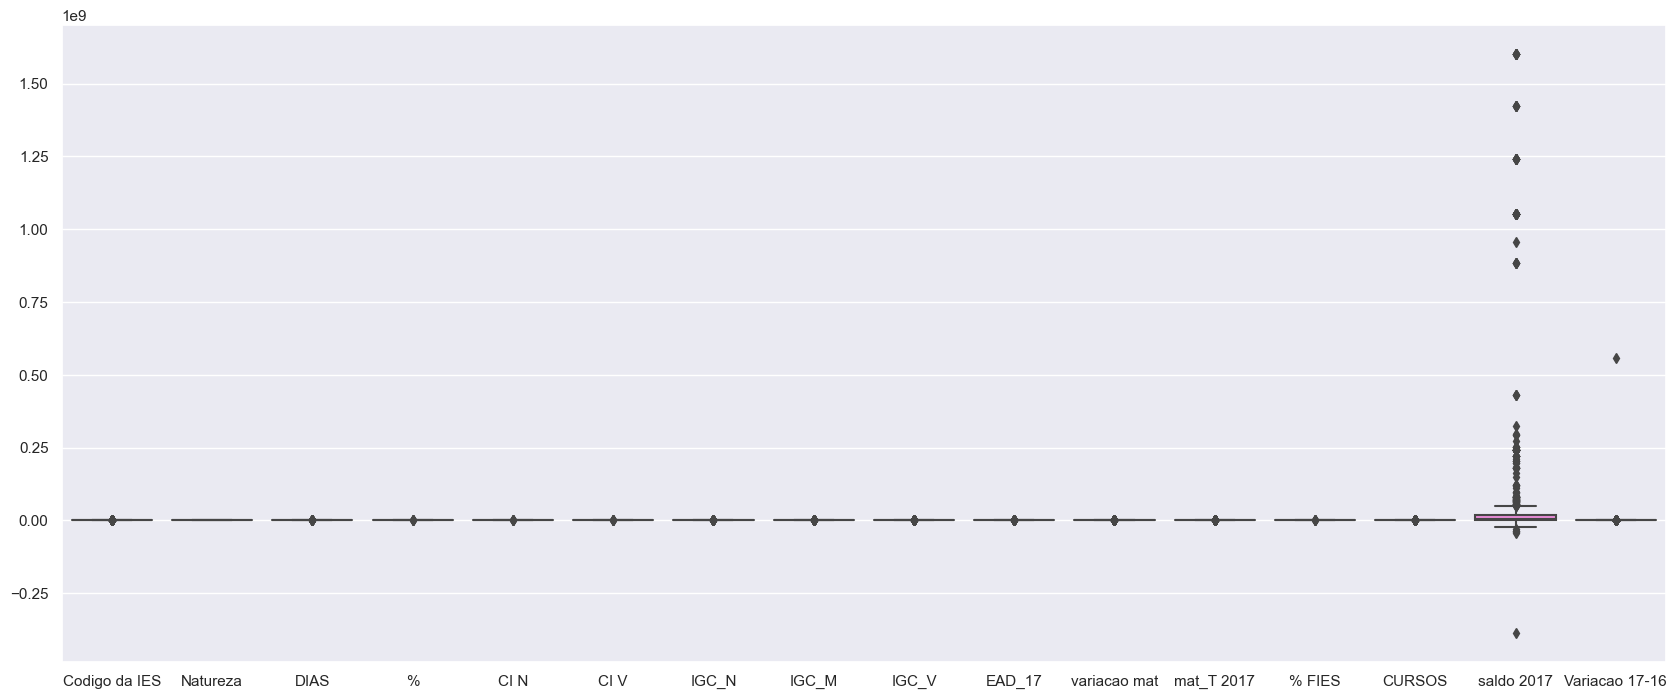

In [49]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.boxplot(df)

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: >

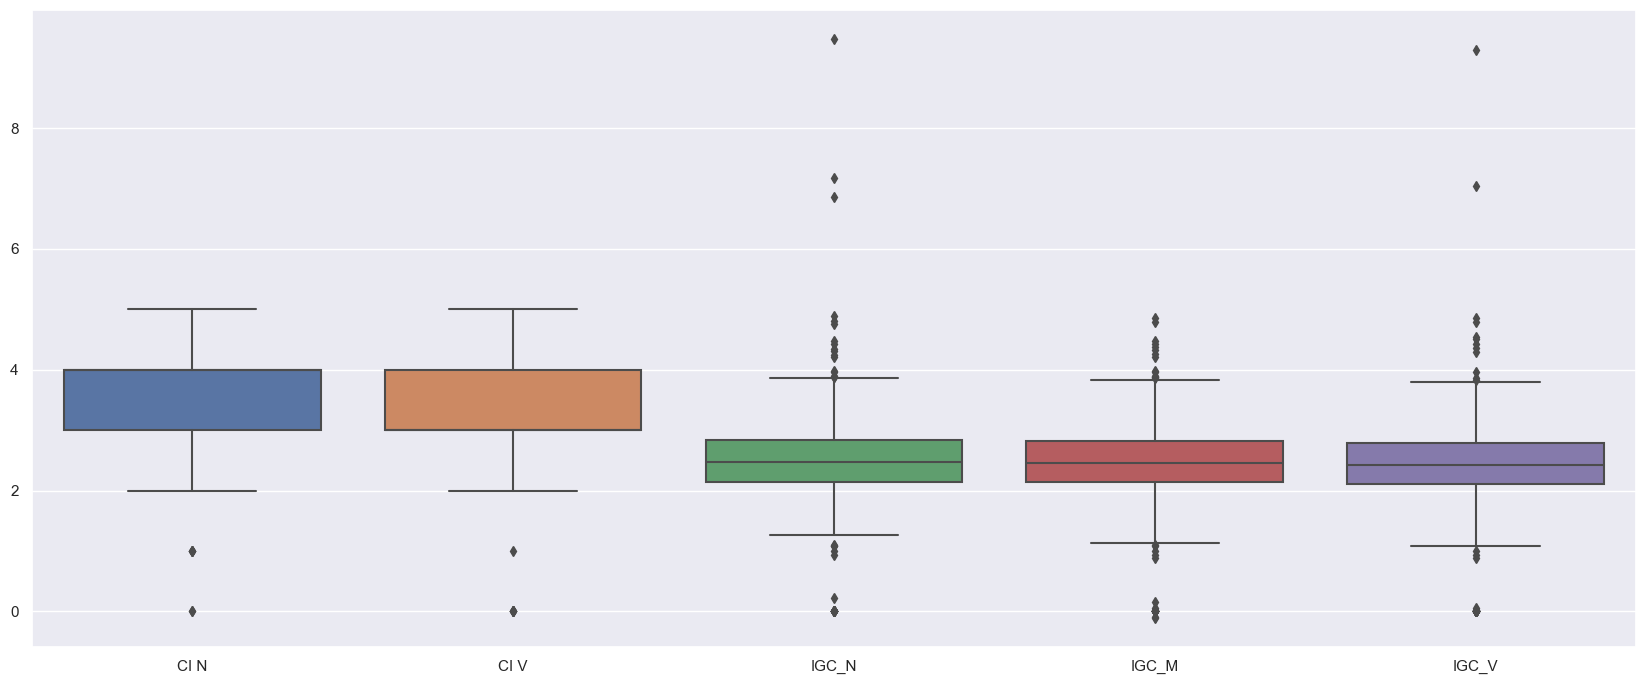

In [50]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.boxplot(df[['CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V']])

--------------------------